# ASSOCIATIONS: QUANTITATIVE AND CATEGORICAL VARIABLES

## Introduction

Examining the relationship between variables can give us key insight into our data. In this lesson, we will cover ways of assessing the association between a quantitative variable and a categorical variable.

In the next few exercises, we’ll explore a dataset that contains the following information about students at two portuguese schools:

- `school`: the school each student attends, Gabriel Periera ('GP') or Mousinho da Silveria ('MS')
- `address`: the location of the student’s home ('U' for urban and 'R' for rural)
- `absences`: the number of times the student was absent during the school year
- `Mjob`: the student’s mother’s job industry
- `Fjob`: the student’s father’s job industry
- `G3`: the student’s score on a math assessment, ranging from 0 to 20

Suppose we want to know: Is a student’s score (G3) associated with their school (school)? If so, then knowing what school a student attends gives us information about what their score is likely to be. For example, maybe students at one of the schools consistently score higher than students at the other school.

To start answering this question, it is useful to save scores from each school in two separate lists:

```python
scores_GP = students.G3[students.school == 'GP']
scores_MS = students.G3[students.school == 'MS']
```


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

students = pd.read_csv("../data/students2.csv")

# print the first five rows of students:
print(students.head())

# separate out scores for students who live in urban and rural locations:
scores_urban = students.G3[students.address == "U"]
scores_rural = students.G3[students.address == "R"]

  school address  absences     Mjob      Fjob  G3
0     GP       U         6  at_home   teacher   6
1     GP       U         4  at_home     other   6
2     GP       U        10  at_home     other  10
3     GP       U         2   health  services  15
4     GP       U         4    other     other  10


## Mean and Median Differences

Recall that in the last exercise, we began investigating whether or not there is an association between math scores and the school a student attends. We can begin quantifying this association by using two common summary statistics, mean and median differences. To calculate the difference in mean G3 scores for the two schools, we can start by finding the mean math score for students at each school. We can then find the difference between them:

```python
mean_GP = np.mean(scores_GP)
mean_MS = np.mean(scores_MS)
print(mean_GP) #output: 10.49
print(mean_MS) #output: 9.85
print(mean_GP - mean_MS) #Output: 0.64
```

We see that the mean math score for students at GP is 10.49, while the mean score for students at MS is 9.85. The mean difference is 0.64. We can follow a similar process to calculate a median difference:

```python
median_GP = np.median(scores_GP)
median_MS = np.median(scores_MS)
print(median_GP) #Output: 11.0
print(median_MS) #Output: 10.0
print(median_GP-median_MS) #Output: 1.0
```

GP students also have a higher median score, by one point. Highly associated variables tend to have a large mean or median difference. Since "large" could have different meanings depending on the variable, we will go into more detail in the next exercise.


In [14]:
scores_urban = students.G3[students.address == "U"]
scores_rural = students.G3[students.address == "R"]

# calculate means for each group:
scores_urban_mean = np.mean(scores_urban)
scores_rural_mean = np.mean(scores_rural)

# print mean scores:
print("Mean score - students w/ urban address:")
print(scores_urban_mean)
print("Mean score - students w/ rural address:")
print(scores_rural_mean)

# calculate mean difference:
mean_diff = scores_urban_mean - scores_rural_mean

# print mean difference
print("Mean difference:")
print(mean_diff)

# calculate medians for each group:
scores_urban_median = np.median(scores_urban)
scores_rural_median = np.median(scores_rural)

# print median scores
print("Median score - students w/ urban address:")
print(scores_urban_median)
print("Median score - students w/ rural address:")
print(scores_rural_median)

# calculate median difference
median_diff = scores_urban_median - scores_rural_median

# print median difference
print("Median difference:")
print(median_diff)

Mean score - students w/ urban address:
10.674267100977199
Mean score - students w/ rural address:
9.511363636363637
Mean difference:
1.1629034646135619
Median score - students w/ urban address:
11.0
Median score - students w/ rural address:
10.0
Median difference:
1.0


## Side-by-Side Box Plots

The difference in mean math scores for students at GP and MS was 0.64. How do we know whether this difference is considered small or large? To answer this question, we need to know something about the spread of the data.

One way to get a better sense of spread is by looking at a visual representation of the data. Side-by-side box plots are useful in visualizing mean and median differences because they allow us to visually estimate the variation in the data. This can help us determine if mean or median differences are “large” or “small”.

Let’s take a look at side by side boxplots of math scores at each school:

```python
sns.boxplot(data = df, x = 'school', y = 'G3')
plt.show()
```

Looking at the plot, we can clearly see that there is a lot of overlap between the boxes (i.e. the middle 50% of the data). Therefore, we can be more confident that there is not much difference between the math scores of the two groups.

In this version, the boxes barely overlap, demonstrating that the middle 50% of scores are different for the two schools. This would be evidence of a stronger association between school and math score.


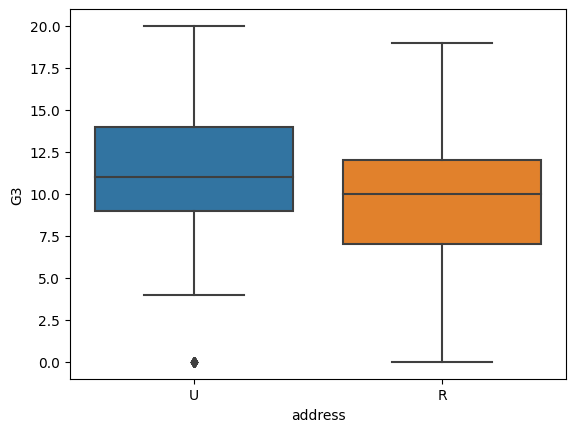

In [8]:
# create the boxplot here:
sns.boxplot(data=students, x="address", y="G3")

plt.show()

## Inspecting Overlapping Histograms

Another way to explore the relationship between a quantitative and categorical variable in more detail is by inspecting overlapping histograms. In the code below, setting alpha = .5 ensures that the histograms are see-through enough that we can see both of them at once. We have also used normed=True make sure that the y-axis is a density rather than a frequency (note: the newest version of matplotlib renamed this parameter density instead of normed):

```python
plt.hist(scores_GP , color="blue", label="GP", normed=True, alpha=0.5)
plt.hist(scores_MS , color="red", label="MS", normed=True, alpha=0.5)
plt.legend()
plt.show()
```

![overlapping](https://static-assets.codecademy.com/Courses/Hypothesis-Testing/overlapping_dens.svg)

By inspecting this histogram, we can clearly see that the entire distribution of scores at GP (not just the mean or median) appears slightly shifted to the right (higher) compared to the scores at MS. However, there is also still a lot of overlap between the scores, suggesting that the association is relatively weak.

Note that there are only 46 students at MS, but there are 349 students at GP. If we hadn’t used normed = True, our histogram would have looked like this, making it impossible to compare the distributions fairly:

![normed=True](https://static-assets.codecademy.com/Courses/Hypothesis-Testing/overlapping_freq.svg)

While overlapping histograms and side by side boxplots can convey similar information, histograms give us more detail and can be useful in spotting patterns that were not visible in a box plot (eg., a bimodal distribution). For example, the following set of box plots and overlapping histograms illustrate the same hypothetical data:

![side-by-side](https://static-assets.codecademy.com/Courses/Hypothesis-Testing/fake_school_boxplots_and_hist.svg)

While the box plots and means/medians appear similar, the overlapping histograms illuminate the differences between these two distributions of scores.


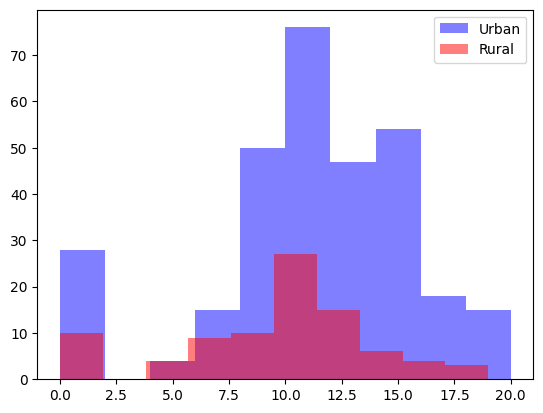

In [13]:
# create the overlapping histograms here:
plt.hist(scores_urban, color="blue", label="Urban", alpha=0.5)
plt.hist(scores_rural, color="red", label="Rural", alpha=0.5)
plt.legend()
plt.show()

## Exploring Non-Binary Categorical Variables

In each of the previous exercises, we assessed whether there was an association between a quantitative variable (math scores) and a BINARY categorical variable (school). The categorical variable is considered binary because there are only two available options, either MS or GP. However, sometimes we are interested in an association between a quantitative variable and non-binary categorical variable. Non-binary categorical variables have more than two categories.

When looking at an association between a quantitative variable and a non-binary categorical variable, we must examine all pair-wise differences. For example, suppose we want to know whether or not an association exists between math scores (G3) and (Mjob), a categorical variable representing the mother’s job. This variable has five possible categories: at_home, health, services, teacher, or other. There are actually 10 different comparisons that we can make. For example, we can compare scores for students whose mothers work at_home or in health; at_home or other; at home or `services; etc.. The easiest way to quickly visualize these comparisons is with side-by-side box plots:

```python
sns.boxplot(data = df, x = 'Mjob', y = 'G3')
plt.show()
```

![title](https://static-assets.codecademy.com/Courses/Hypothesis-Testing/mjob_box_plots.svg)

Visually, we need to compare each box to every other box. While most of these boxes overlap with each other, there are some pairs for which there are some apparent differences. For example, scores appear to be higher among students with mothers working in health than among students with mothers working at home or in an “other” job. If there are ANY pairwise differences, we can say that the variables are associated; however, it is more useful to specifically report which groups are different.


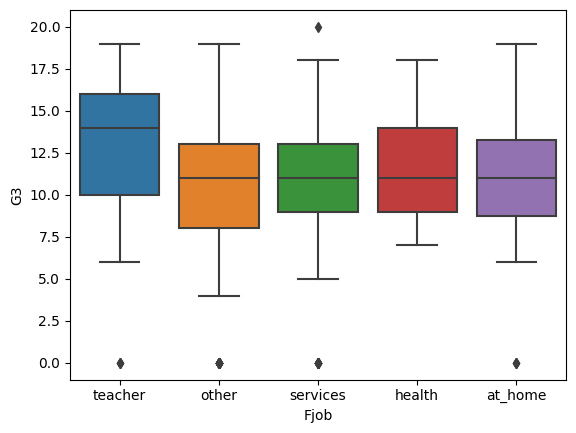

In [ ]:
# create the box-plot here:
sns.boxplot(data=students, x="Fjob", y="G3")
plt.show()

## Review

In this lesson, we used summary statistics and data visualization tools to examine an association between a quantitative and categorical variable. More specifically, we:

- evaluated mean and median differences
- inspected side-by-side box plots
- examined overlapping histograms
- looked at pair-wise comparisons for a quantitative and a non-binary categorical variable

After calculating a mean or median difference and visually comparing distributions, the next step might be to run a hypothesis test to look for evidence of population-level differences (will a similar difference in scores be observed for ALL students who ever attend these schools?). Now that you know how to investigate whether variables are associated, you can use these techniques to explore associations on more datasets.

Note that data in this lesson was downloaded from the UCI Machine Learning repository:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [archive.ics.uci.edu/ml/index.php]. Irvine, CA: University of California, School of Information and Computer Science.

The data was originally collected by:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

### Instructions

A new dataset named titanic has been uploaded for you in script.py. This data contains information about passengers on the Titanic, including the amount they paid for their fare and whether or not they survived (note: this is a subset of the full data available). To practice the skills learned in this lesson, let’s investigate whether there is an association between the fare that a passenger paid (Fare) and whether or not they survived (Survived, which is equal to 0 if the passenger died and 1 if they survived):

- Calculate the difference in mean fare paid by those who survived and those who died. 
  - Which group paid a higher average fare?
- Calculate the difference in median fare for those who survived and those who died.
- Create side-by-side box plots of fares by survival.
  -  Now that you can see the spread of the data, do the mean/median differences seem relatively small or large?
- Create overlapping histograms of fares by survival \
  - (you'll have to delete or comment out your box plot code before you try to make a histogram).
  -  Does this provide any additional information?


In [26]:
titanic = pd.read_csv("../data/titanic.csv")

print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [25]:
# separate out fares by survival
fares_died, fares_survived = (
    titanic.Fare[titanic.Survived == 0],
    titanic.Fare[titanic.Survived == 1],
)

# mean difference
mean_fare_died, mean_fare_surv = np.mean(fares_died), np.mean(fares_survived)

mean_diff = mean_fare_surv - mean_fare_died
print(f"  mean difference: {mean_diff}")

# median difference
med_fare_died, med_fare_surv = np.median(fares_died), np.median(fares_survived)

med_diff = med_fare_surv - med_fare_died
print(f"median difference: {med_diff}")

  mean difference: 18.082197554799443
median difference: 15.5375


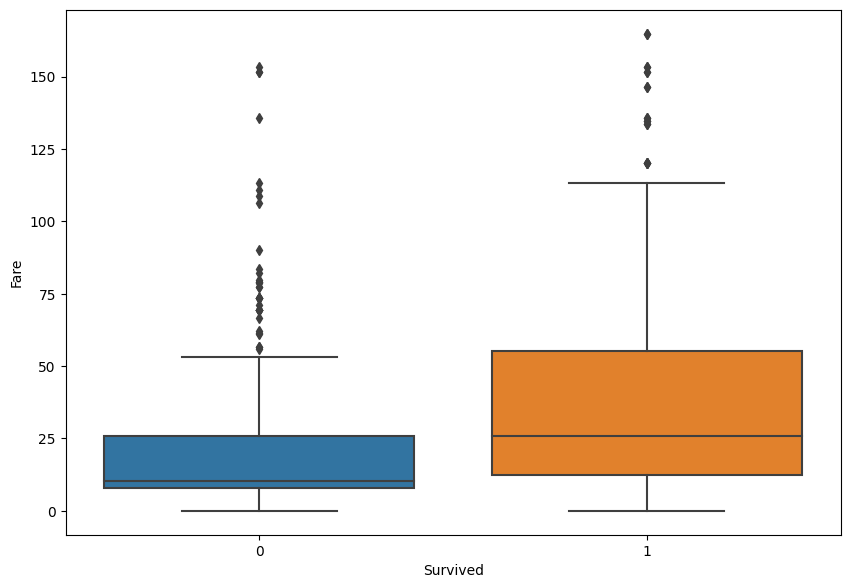

In [19]:
# create subplots (scroll to see plots)
fig = plt.figure(figsize=(10, 15))

# create the boxplot:
ax = fig.add_subplot(2, 1, 1)
ax = sns.boxplot(data=titanic, x="Survived", y="Fare")

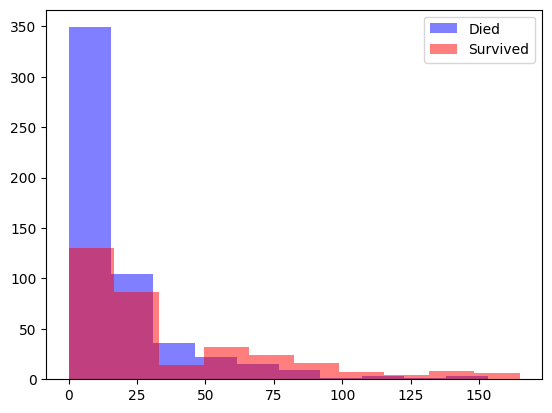

In [18]:
# create the histograms:
ax = fig.add_subplot(2, 1, 2)
ax = plt.hist(fares_died, color="blue", label="Died", alpha=0.5)
ax = plt.hist(fares_survived, color="red", label="Survived", alpha=0.5)
ax = plt.legend()
plt.show()